In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
df = pd.read_csv('NaiveBayes.csv')

In [3]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.isna().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [5]:
df.shape

(400, 3)

<AxesSubplot:>

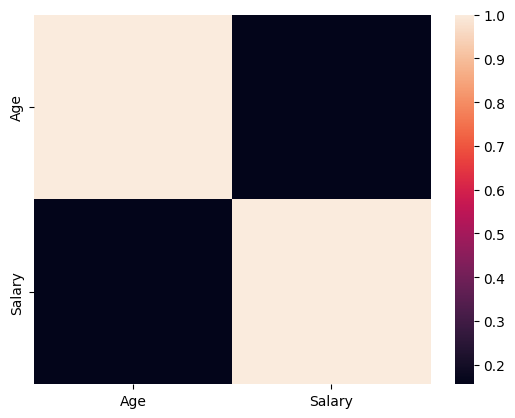

In [10]:
corr_data = df.iloc[:, : -1].corr(method='pearson')
sns.heatmap(corr_data)

In [14]:
x = df[['Age','Salary']]
x.head()

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [16]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [20]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred = model.predict(x_test)

In [25]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.9125

In [28]:
report = metrics.classification_report(y_test,y_pred)
print(f'Classification report: \n {report}')

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



In [30]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix: \n {conf_mat}')

Confusion Matrix: 
 [[48  4]
 [ 3 25]]


Text(0.5, 1.0, 'confusion matrix')

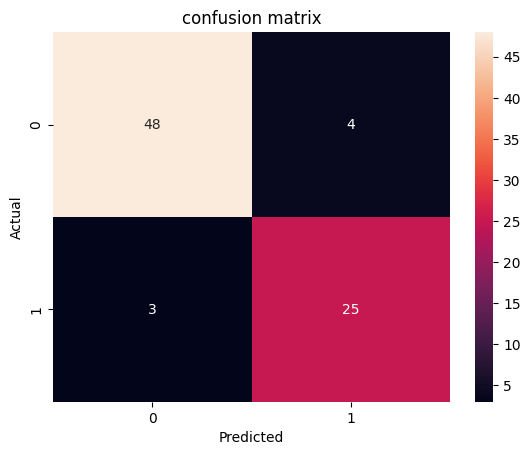

In [33]:
sns.heatmap(conf_mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("confusion matrix")


In [35]:
y_score = model.predict_proba(x_test)[:, -1]
y_score

array([0.33711449, 0.17885133, 0.52465735, 0.54625167, 0.013987  ,
       0.94955346, 0.19256177, 0.54756152, 0.10700251, 0.24229283,
       0.27493362, 0.22789178, 0.99831516, 0.93295979, 0.56078151,
       0.20861393, 0.06796358, 0.01745385, 0.06848107, 0.80284464,
       0.02713603, 0.01420833, 0.19496501, 0.97740189, 0.93491206,
       0.14314823, 0.17420816, 0.95740257, 0.61952041, 0.12708499,
       0.13506465, 0.05200155, 0.07164904, 0.68619364, 0.95368458,
       0.08471136, 0.69785326, 0.96454518, 0.22320425, 0.03353728,
       0.25947845, 0.44160739, 0.02349996, 0.04332634, 0.13271851,
       0.07941568, 0.98552361, 0.19256177, 0.2204428 , 0.01914261,
       0.37328903, 0.75778217, 0.54785644, 0.13612115, 0.30420014,
       0.2043935 , 0.7937033 , 0.04005942, 0.78787621, 0.99947418,
       0.04249366, 0.83559953, 0.16450689, 0.94864142, 0.99490575,
       0.57326253, 0.33711449, 0.99734275, 0.01156216, 0.25497748,
       0.18255682, 0.44618299, 0.03237241, 0.03353728, 0.06900

In [38]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
rocauc = metrics.auc(fpr,tpr)

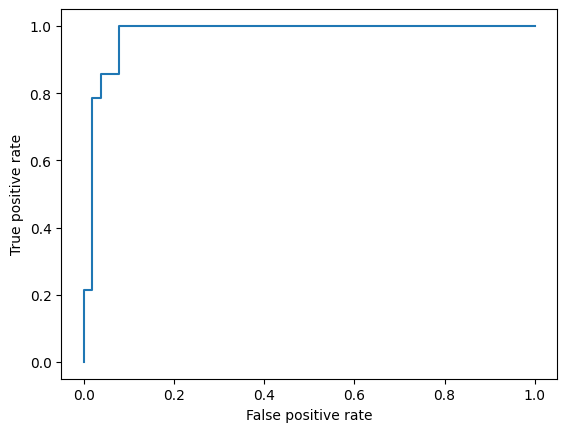

In [41]:
plt.plot(fpr,tpr,label="data 1, auc="+str(rocauc))
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()